In [1]:
# PDE, Heat equation using simple derivative operator (differtiation)

In [2]:
from numpy import *
from pylab import *
%pylab

Using matplotlib backend: <object object at 0x7f78386b19b0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/alex/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
def exact(t):
    return t**2 * (exp(t) - exp(1))

def func(y, t, h, order):
    taylor = 2*y/t + t**2 * exp(t)
    if order >= 2:
        taylor += (h/2) * ((2*y/(t**2)) + exp(t)*(t**2 + 4*t))
    if order >= 3:
        taylor += (h**2/6) * (exp(t)*(t**2 + 6*t + 6))
    if order >= 4:
        taylor += (h**3/24) * (exp(t)*(t**2 + 8*t + 12))
    return taylor

def get_euler(N, order):
    x = linspace(1, 2, N+1)
    h = 1 / N
    w = 0 # initial value
    w_list, exact_list = [w], [exact(x[0])]
    for i in range(N):
        w = w + h*func(y=w, t=x[i], h=h, order=order)
        w_list.append(w)
        exact_list.append(exact(x[i+1]))
    return w_list, exact_list

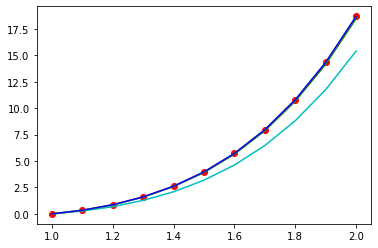

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

N = 10 # h = 1/N
first_order, answer = get_euler(N, 1)
second_order, _ = get_euler(N, 2)
third_order, _ = get_euler(N, 3)
fourth_order, _ = get_euler(N, 4)
x = linspace(1, 2, N+1)

plt.plot(x, first_order, color='c')
plt.plot(x, second_order, color='g')
plt.plot(x, third_order, color='y')
plt.plot(x, fourth_order, color='b')
plt.scatter(x, answer, color='r', marker="o")

plt.show()
# plt.plot(log10(N), log10(error))
# plt.xlabel('log10(N)')
# plt.ylabel('log10(error)')
# plt.title('Error as N grows; log10 scale')
# plt.show()

In [5]:
for i in range(len(second_order)):
    print(f"Second Order: {round(second_order[i],3)}, Fourth_order: {round(fourth_order[i],3)}, Exact_value :{round(answer[i], 3)} ")

Second Order: 0, Fourth_order: 0, Exact_value :0.0 
Second Order: 0.34, Fourth_order: 0.346, Exact_value :0.346 
Second Order: 0.852, Fourth_order: 0.867, Exact_value :0.867 
Second Order: 1.582, Fourth_order: 1.607, Exact_value :1.607 
Second Order: 2.581, Fourth_order: 2.62, Exact_value :2.62 
Second Order: 3.911, Fourth_order: 3.968, Exact_value :3.968 
Second Order: 5.643, Fourth_order: 5.721, Exact_value :5.721 
Second Order: 7.86, Fourth_order: 7.964, Exact_value :7.964 
Second Order: 10.66, Fourth_order: 10.793, Exact_value :10.794 
Second Order: 14.153, Fourth_order: 14.323, Exact_value :14.323 
Second Order: 18.47, Fourth_order: 18.683, Exact_value :18.683 


In [6]:
s_1 = second_order[0]*0.6 + second_order[1]*0.4
s_2 = second_order[5]*0.5 + second_order[6]*0.5
s_3 = second_order[9]*0.3 + second_order[10]*0.7

print(f"1.04 || Second_order_linear_approx: {s_1}, Exact: {exact(1.04)}")
print(f"1.55 || Second_order_linear_approx: {s_2}, Exact: {exact(1.55)}")
print(f"1.97 || Second_order_linear_approx: {s_3}, Exact: {exact(1.97)}")

1.04 || Second_order_linear_approx: 0.13591409142295227, Exact: 0.11998749706134393
1.55 || Second_order_linear_approx: 4.777032797589342, Exact: 4.788635020801403
1.97 || Second_order_linear_approx: 17.174800764902507, Exact: 17.279298435557664
